In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Funding rate using coinglass - No FTX

url = 'https://open-api.coinglass.com/api/pro/v1/futures/vol/chart?symbol=BTC'
headers = {
  'coinglassSecret': 'a783e8583b66475cba597ab4e0bfeb24'
}
response = requests.request('get', url, headers=headers)
raw = response.json()

In [ ]:
symbol = 'BTC'
url = f'https://open-api.coinglass.com/api/pro/v1/futures/funding_rates_chart?symbol={symbol}&type=U'
headers = {
  'coinglassSecret': 'a783e8583b66475cba597ab4e0bfeb24'
}
response = requests.request('get', url, headers=headers)
raw = response.json()

In [ ]:
df = pd.DataFrame.from_dict(raw['data']['dateList'])
df.rename(columns={0: 'epoch'}, inplace=True)
df['epoch'] = df['epoch']/1000
df['epoch'] = df['epoch'].astype(int)
df['date'] = pd.to_datetime(df['epoch'], unit='s', utc=True)

In [ ]:
df[f'price_{symbol.lower()}'] = raw['data']['priceList']

In [ ]:
keys = list(raw['data']['dataMap'].keys())
keys_low = [x.lower() for x in keys]

for i in range(0, len(keys)):
    df[f'fr_{keys_low[i]}'] = raw['data']['dataMap'][keys[i]]

In [ ]:
df.drop(542, inplace=True)

In [ ]:
### take a look at the funding rate over time
fig, ax = plt.subplots(figsize =(20,4))

ax.plot(df['date'], (df['fr_binance']*3*365/100).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['fr_huobi']*3*365/100).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['fr_bybit']*3*365/100).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['fr_okx']*3*365/100).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['fr_bitmex']*3*365/100).rolling(7, min_periods=1).mean(), linewidth=1.5)
#ax.plot(df['date'], (df['fr_coinex']*3*365/100).rolling(7, min_periods=1).mean(), linewidth=1.5)

ax.set_ylabel('Annualized funding rate for Bitcoin across exchanges')

left, right = plt.xlim()
ax.set_xlim(left+10, right-10)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.grid(axis='y', linestyle='--', linewidth=.5)

txt = 'The figure presents the 7-day moving average annualized funding rate for BTC across exchanges. The data is obtained from coinclass, an anlytics platform. It also covers the FTX collapse. \n The FTX collapse let to significant negativ funding rates, thus the perpetual future prices where lower than the spot prices. The funding rates become more volatile after the event, indicating increased uncertainty for the market participants.'
fig.text(.5, -.1, txt, ha='center', fontstyle='italic')

ax.legend(['binance', 'huobi', 'bybit', 'okx', 'bitmex', 'coinex'], loc='lower right')

plt.savefig(f'figures/exchange_fr.png')

plt.show()

## Funding rate using glassnode - with FTX

In [ ]:
#additional data source glassnode
df = pd.read_csv('data/bitcoin-futures-perpetual-funding-rate.csv')
df = df[::8]
df['date'] = pd.to_datetime(df['timestamp'], utc=True)


In [ ]:
### take a look at the funding rate over time
fig, ax = plt.subplots(figsize =(20,8))

ax.plot(df['date'], (df['binance']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['bitfinex']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['huobi']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['bybit']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['ftx']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
#ax.plot(df['date'], (df['okex']*3*365).rolling(7, min_periods=1).mean(), linewidth=1)

ax.set_ylabel('Annualized funding rate for Bitcoin across exchanges')

left, right = plt.xlim()
ax.set_xlim(left+42, right-42)

ax.set_ylim(-3.75, 5.75)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.grid(axis='y', linestyle='--', linewidth=.5)

ax.axvspan(18325, 18365, facecolor='grey', alpha=0.25)
txt = 'COVID market crash'
#20.02. - 07.04.
fig.text(.17, 0.835, txt, ha='center', fontsize = 'medium', fontstyle='italic', bbox=dict(facecolor='white', alpha=1))

ax.axvspan(19300, 19320, facecolor='grey', alpha=0.25)
txt = 'FTX insolvency'
#05.11. - 15.11.
fig.text(.8675, 0.835, txt, ha='center', fontsize = 'medium', fontstyle='italic', bbox=dict(facecolor='white', alpha=1))


txt = 'The figure presents the 7-day moving average annualized funding rate for Bitcoin (BTC) across exchanges. The data is obtained from glassnode, an anlytics platform. The data covers two major market turbulences: \n the COVID stock market crash from February to April 2020, and the FTX insolvency in November 2022. The FTX collapse led to significant negativ funding rates on all solvent exchanges, \n thus the perpetual future prices were lower than the spot prices on the solvent exchanges. Vice versa on the insolvent FTX. \n The funding rates become more volatile after the event, indicating increased uncertainty for the market participants.'
fig.text(.5, -.05, txt, ha='center', fontstyle='italic')

ax.legend(['binance', 'bitfinex', 'huobi', 'bybit', 'ftx'], loc='lower right')

plt.savefig(f'figures/exchanges_fr_bitcoin.png')

plt.show()

In [ ]:
#additional data source glassnode
df = pd.read_csv('data/ethereum-futures-perpetual-funding-rate.csv')
df = df[::8]
df['date'] = pd.to_datetime(df['timestamp'], utc=True)


In [ ]:
### take a look at the funding rate over time
fig, ax = plt.subplots(figsize =(20,8))

ax.plot(df['date'], (df['binance']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['bitfinex']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['huobi']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['bybit']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
ax.plot(df['date'], (df['ftx']*3*365).rolling(7, min_periods=1).mean(), linewidth=1.5)
#ax.plot(df['date'], (df['okex']*3*365).rolling(7, min_periods=1).mean(), linewidth=1)

ax.set_ylabel('Annualized funding rate for Bitcoin across exchanges')

left, right = plt.xlim()
ax.set_xlim(left+42, right-42)

ax.set_ylim(-11, 6.5)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.grid(axis='y', linestyle='--', linewidth=.5)

ax.axvspan(18325, 18365, facecolor='grey', alpha=0.25)
txt = 'COVID market crash'
#20.02. - 07.04.
fig.text(.17, 0.835, txt, ha='center', fontsize = 'medium', fontstyle='italic', bbox=dict(facecolor='white', alpha=1))

ax.axvspan(19300, 19320, facecolor='grey', alpha=0.25)
txt = 'FTX insolvency'
#05.11. - 15.11.
fig.text(.8675, 0.835, txt, ha='center', fontsize = 'medium', fontstyle='italic', bbox=dict(facecolor='white', alpha=1))


txt = 'The figure presents the 7-day moving average annualized funding rate for Ether (ETH) across exchanges. The data is obtained from glassnode, an anlytics platform. The data covers two major market turbulences: \n the COVID stock market crash from February to April 2020, and the FTX insolvency in November 2022. The FTX collapse led to significant negativ funding rates on all solvent exchanges, \n thus the perpetual future prices were lower than the spot prices on the solvent exchanges. Vice versa on the insolvent FTX. \n The funding rates become more volatile after the event, indicating increased uncertainty for the market participants.'
fig.text(.5, -.05, txt, ha='center', fontstyle='italic')

ax.legend(['binance', 'bitfinex', 'huobi', 'bybit', 'ftx'], loc='lower left')

plt.savefig(f'figures/exchanges_fr_ethereum.png')

plt.show()

## Volume

In [2]:
spot = ['gdax', 'lbank', 'upbit', 'bkex', 'binance', 'hitbtc', 'poloniex', 'huobi', 'bitfinex', 'bitforex', 'kraken', 'bitget', 'okex', 'mxc', 'bybit_spot','bingx', 'kucoin','gate', 'bitmex_spot', 'crypto_com']
futures = ['binance_futures', 'hitbtc_derivatives', 'poloniex_futures', 'perpetual_protocol', 'huobi_dm', 'bitfinex_futures', 'bitrue_futures', 'bitforex_futures', 'kraken_futures', 'bitget_futures', 'okex_swap', 'mxc_futures', 'bybit', 'bingx_futures', 'kumex', 'gate_futures', 'bitmex', 'deribit', 'dydx_perpetual', 'crypto_com_futures']

In [16]:
#raw_lst = []

for i in range(19, len(futures)):
    temp = futures[i]
    print(temp)
    try:
        days = 1099
        response = requests.get(f'https://api.coingecko.com/api/v3/exchanges/{temp}/volume_chart?days={days}')    
    except TypeError:
        days = days - 200
        print('Retrying: ', temp, f'with {days}')
        response = requests.get(f'https://api.coingecko.com/api/v3/exchanges/{temp}/volume_chart?days={days}') 
        
    raw = response.json()
    raw = raw[1:]
    for t in range(0, len(raw)):
        raw[t][0] = int(raw[t][0])
        raw[t][1] = float(raw[t][1])

    raw_lst.append(raw)

crypto_com_futures


In [22]:
for j in range(0, len(raw_lst)):
    try: 
        number = raw_lst[j][-1][1]
        print(number*16000/1e6)
    except: KeyError: print(raw_lst[j])

27016.27017336747
41.1046740011207
7.4770643415124916
10.271494483899021
599.0224893825024
33.043497142353246
8779.17942113021
3001.905563429193
65.4907805741385
5131.996492723803
6816.013629275393
4143.77631934302
4760.507265759251
4407.614104107853
1154.2882133469675
810.5908284760751
333.65799190443545
280.1666747638487
594.3087224599176
288.71382266874053


In [24]:
temp = futures[0]

df = pd.DataFrame(raw_lst[0], columns =['epoch', f'volume_{temp}'])
df['epoch']=df['epoch']/1000
df['epoch']=df['epoch'].astype(int)
df[f'volume_{temp}']=df[f'volume_{temp}'].astype(int)
df['epoch_rounded'] = df['epoch'] - (df['epoch'] % (60*60*24))
df

,epoch,volume_binance_futures,epoch_rounded
0,1568715600,21558,1568678400
1,1568802000,21796,1568764800
2,1568888400,22530,1568851200
3,1568974800,25512,1568937600
4,1569061200,23897,1569024000
...,...,...,...
1169,1670235600,1709341,1670198400
1170,1670322000,1676285,1670284800
1171,1670408400,1744559,1670371200
1172,1670494800,1210351,1670457600


In [25]:
for s in range(1,len(raw_lst)):
    temp = futures[s]
    df_temp = pd.DataFrame(raw_lst[s], columns =['epoch', f'volume_{temp}'])
    df_temp['epoch']=df_temp['epoch']/1000
    df_temp['epoch']=df_temp['epoch'].astype(int)
    df_temp[f'volume_{temp}']=df_temp[f'volume_{temp}'].astype(int)
    df_temp['epoch_rounded'] = df_temp['epoch'] - (df_temp['epoch'] % (60*60*24))
    df = df.merge(df_temp[['epoch_rounded', f'volume_{temp}']], how='left', on='epoch_rounded')


In [26]:
df.drop(columns=['epoch'], inplace=True)
df.rename(columns={'epoch_rounded': 'epoch'}, inplace=True)
df_volume = df
df_volume

,volume_binance_futures,epoch,volume_hitbtc_derivatives,volume_poloniex_futures,volume_perpetual_protocol,volume_huobi_dm,volume_bitfinex_futures,volume_bitrue_futures,volume_bitforex_futures,volume_kraken_futures,...,volume_okex_swap,volume_mxc_futures,volume_bybit,volume_bingx_futures,volume_kumex,volume_gate_futures,volume_bitmex,volume_deribit,volume_dydx_perpetual,volume_crypto_com_futures
0,21558,1568678400,NaN,NaN,NaN,224590,NaN,NaN,5518,6377.0,...,240493.0,NaN,83849,NaN,NaN,NaN,NaN,23935.0,NaN,NaN
1,21796,1568764800,NaN,NaN,NaN,278486,NaN,NaN,5228,7300.0,...,280698.0,NaN,81960,NaN,NaN,NaN,NaN,17535.0,NaN,NaN
2,22530,1568851200,NaN,NaN,NaN,327448,NaN,NaN,7786,11093.0,...,367993.0,NaN,102734,NaN,NaN,NaN,NaN,29293.0,NaN,NaN
3,25512,1568937600,NaN,NaN,NaN,307930,NaN,NaN,8751,8502.0,...,310698.0,NaN,101179,NaN,NaN,NaN,NaN,32866.0,NaN,NaN
4,23897,1569024000,NaN,NaN,NaN,218616,NaN,NaN,5785,3923.0,...,218696.0,NaN,76314,NaN,NaN,NaN,NaN,19909.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,1709341,1670198400,3038.0,513.0,615.0,32637,2324.0,466373.0,192761,2969.0,...,414807.0,338248.0,298877,440824.0,73447.0,50354.0,19041.0,14758.0,31824.0,15407.0
1177,1676285,1670284800,3461.0,575.0,863.0,33143,2394.0,478570.0,189004,3876.0,...,402902.0,255352.0,298723,222165.0,80713.0,49362.0,19443.0,14265.0,30010.0,15844.0
1178,1744559,1670371200,3589.0,550.0,812.0,39819,2523.0,539341.0,209034,3596.0,...,475945.0,318774.0,316919,436385.0,63485.0,52097.0,19227.0,13958.0,37111.0,18966.0
1179,1210351,1670457600,2779.0,388.0,557.0,27191,2219.0,494845.0,214812,1863.0,...,291944.0,265511.0,196474,171160.0,64460.0,32379.0,12714.0,10433.0,22617.0,15755.0


In [70]:
response = requests.get(f'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&interval=daily')
price = response.json()

df_price = pd.DataFrame(price['prices'], columns =['epoch', 'btc_price'])
df_price['epoch'] = df_price['epoch']/1000
df_price['epoch'] = df_price['epoch'].astype(int)
df_price['date'] = pd.to_datetime(df_price['epoch'], unit='s', utc=True)
df_price['btc_price'] = np.round(df_price['btc_price'], 2)
df_price = df_price[:-1]

In [73]:
df_price = df_price[df_price['date']>= '2020']

In [74]:
df_price

,epoch,btc_price,date
2437,1577836800,7195.15,2020-01-01 00:00:00+00:00
2438,1577923200,7193.75,2020-01-02 00:00:00+00:00
2439,1578009600,6963.85,2020-01-03 00:00:00+00:00
2440,1578096000,7300.35,2020-01-04 00:00:00+00:00
2441,1578182400,7351.38,2020-01-05 00:00:00+00:00
...,...,...,...
3506,1670198400,17149.93,2022-12-05 00:00:00+00:00
3507,1670284800,16973.37,2022-12-06 00:00:00+00:00
3508,1670371200,17085.64,2022-12-07 00:00:00+00:00
3509,1670457600,16851.30,2022-12-08 00:00:00+00:00


In [28]:
df = df_price.merge(df_volume, how='left', on='epoch')
df = df.fillna(0)
df

,epoch,btc_price,date,volume_binance_futures,volume_hitbtc_derivatives,volume_poloniex_futures,volume_perpetual_protocol,volume_huobi_dm,volume_bitfinex_futures,volume_bitrue_futures,...,volume_okex_swap,volume_mxc_futures,volume_bybit,volume_bingx_futures,volume_kumex,volume_gate_futures,volume_bitmex,volume_deribit,volume_dydx_perpetual,volume_crypto_com_futures
0,1367107200,135.30,2013-04-28 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1367193600,141.96,2013-04-29 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1367280000,135.30,2013-04-30 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1367366400,117.00,2013-05-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1367452800,103.43,2013-05-02 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,1670198400,17149.93,2022-12-05 00:00:00+00:00,1709341.0,3038.0,513.0,615.0,32637.0,2324.0,466373.0,...,414807.0,338248.0,298877.0,440824.0,73447.0,50354.0,19041.0,14758.0,31824.0,15407.0
3515,1670284800,16973.37,2022-12-06 00:00:00+00:00,1676285.0,3461.0,575.0,863.0,33143.0,2394.0,478570.0,...,402902.0,255352.0,298723.0,222165.0,80713.0,49362.0,19443.0,14265.0,30010.0,15844.0
3516,1670371200,17085.64,2022-12-07 00:00:00+00:00,1744559.0,3589.0,550.0,812.0,39819.0,2523.0,539341.0,...,475945.0,318774.0,316919.0,436385.0,63485.0,52097.0,19227.0,13958.0,37111.0,18966.0
3517,1670457600,16851.30,2022-12-08 00:00:00+00:00,1210351.0,2779.0,388.0,557.0,27191.0,2219.0,494845.0,...,291944.0,265511.0,196474.0,171160.0,64460.0,32379.0,12714.0,10433.0,22617.0,15755.0


In [29]:
for r in range(3,22+1):
    df[df.columns[r]] = (df['btc_price'] * df[df.columns[r]])/1e6
    
df['sum']= df[df.columns[3:]].sum(axis='columns')
df

In [36]:
#outlier
df[df['sum'] > 400000]
df['sum'].loc[3232] = df['sum'].loc[3232-1]

,epoch,btc_price,date,volume_binance_futures,volume_hitbtc_derivatives,volume_poloniex_futures,volume_perpetual_protocol,volume_huobi_dm,volume_bitfinex_futures,volume_bitrue_futures,...,volume_mxc_futures,volume_bybit,volume_bingx_futures,volume_kumex,volume_gate_futures,volume_bitmex,volume_deribit,volume_dydx_perpetual,volume_crypto_com_futures,sum
2946,1621468800,37287.39,2021-05-20 00:00:00+00:00,189919.443076,0.00000,79.608578,512.328739,102440.466870,769.388005,0.000000,...,18458.861408,70839.888581,0.00000,2759.602447,4987.785011,10708.267235,9823.362896,135.800674,30.650235,5.395983e+05
3232,1646179200,44459.59,2022-03-02 00:00:00+00:00,71550.018596,0.00000,15.116261,85.140115,2796.686049,250.307492,0.000000,...,4072.053848,10014.744945,0.00000,4620.818567,4525.363828,1490.596674,1283.592823,2038.072065,1398.387484,3.752776e+12
3488,1667952000,18562.35,2022-11-09 00:00:00+00:00,138505.443318,212.24191,32.762548,122.047451,3991.072311,286.881119,16443.216437,...,114527.843265,32272.000527,41039.22118,8693.435312,5717.816358,1757.353362,3069.117511,3687.577889,687.809317,4.268035e+05


In [109]:
df = df.drop_duplicates(subset=['epoch'], keep='first')
df.to_csv('data/volume_futures_exchanges.csv', index=False)

In [88]:
print('')
print('###Summary###')
print('median daily volume 2020: $', int(df[(df['date'] >= '2020') & (df['date'] < '2021')]['sum'].median()), 'million')
print('median daily volume 2021: $', int(df[(df['date'] >= '2021') & (df['date'] < '2022')]['sum'].median()), 'million')
print('median daily volume 2022: $', int(df[df['date'] >= '2022']['sum'].median()), 'million')
print('yearly volume 2020: $', int(df[(df['date'] >= '2020') & (df['date'] < '2021')]['sum'].sum()), 'million')
print('yearly volume 2021: $', int(df[(df['date'] >= '2021') & (df['date'] < '2022')]['sum'].sum()), 'million')
print('yearly volume 2022: $', int(df[df['date'] >= '2022']['sum'].mean()*365), 'million')


###Summary###
median daily volume 2020: $ 17874 million
median daily volume 2021: $ 132032 million
median daily volume 2022: $ 101916 million
yearly volume 2020: $ 8536186 million
yearly volume 2021: $ 51989427 million
yearly volume 2022: $ 39304855 million


In [111]:
df_spot = pd.read_csv('data/volume_spot_exchanges.csv')
df_spot = df_spot.drop_duplicates(subset=['epoch'], keep='first')

In [122]:
df_spot = df_spot[df_spot['date'] >= '2020-01-01']
df_spot

,epoch,btc_price,date,volume_gdax,volume_lbank,volume_upbit,volume_bkex,volume_binance,volume_hitbtc,volume_poloniex,...,volume_bitget,volume_okex,volume_mxc,volume_bybit_spot,volume_bingx,volume_kucoin,volume_gate,volume_bitmex_spot,volume_crypto_com,sum
2437,1577836800,7195.15,2020-01-01 00:00:00+00:00,99.055630,939.182930,30.363533,665.299545,485.471161,346.187447,43.674560,...,0.000000,491.759722,1020.380197,0.000000,0.000000,25.075098,14.282373,0.000000,0.000000,5639.263569
2438,1577923200,7193.75,2020-01-02 00:00:00+00:00,55.528556,726.791756,28.746225,539.847775,428.423781,290.533981,39.357006,...,0.000000,456.090944,1038.460975,0.000000,0.000000,25.063025,14.876675,0.000000,0.000000,5152.350788
2439,1578009600,6963.85,2020-01-03 00:00:00+00:00,151.435882,1512.095570,68.155200,1190.971555,843.503295,483.806515,63.635661,...,0.000000,719.546765,1115.295397,0.000000,0.000000,36.539321,37.005899,0.000000,0.000000,8985.218884
2440,1578096000,7300.35,2020-01-04 00:00:00+00:00,122.295463,887.481648,60.403096,1045.023201,739.897773,538.028495,54.438710,...,0.000000,644.526000,1121.435965,0.000000,0.000000,38.450943,30.683371,0.000000,0.000000,7528.522439
2441,1578182400,7351.38,2020-01-05 00:00:00+00:00,88.459156,892.009098,47.930998,906.366343,689.419768,363.415470,66.228582,...,0.000000,571.577146,1023.135663,0.000000,0.000000,37.058307,25.957723,0.000000,0.000000,6677.104075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,1670198400,17149.93,2022-12-05 00:00:00+00:00,1192.314583,1039.886006,1374.686939,619.232523,10562.864836,950.586320,48.877300,...,503.864943,819.972453,2428.087089,307.635444,239.533072,392.253199,452.929651,1.217645,189.746826,22564.608799
3508,1670284800,16973.37,2022-12-06 00:00:00+00:00,1309.325762,1376.676094,1492.502371,562.887869,9825.697186,1191.547547,39.870446,...,588.466738,775.122888,1481.062319,258.402585,243.703646,341.758805,573.818720,2.138645,179.917722,21963.642620
3509,1670371200,17085.64,2022-12-07 00:00:00+00:00,1374.283453,877.398871,1456.038241,636.781803,11726.916956,1184.803706,37.827607,...,525.144231,830.567132,1902.810641,304.500276,300.741435,340.670576,737.501651,1.144738,232.125505,24238.218559
3510,1670457600,16851.30,2022-12-08 00:00:00+00:00,982.565600,818.332831,1092.503482,482.385314,9112.407880,883.058674,33.685749,...,523.620445,576.988512,1151.567288,219.909465,232.514237,274.726744,682.629312,0.572944,192.475549,18810.516394


In [121]:
df_chart = df[df['date'] >= '2020-01-01']
df_chart

,epoch,btc_price,date,volume_binance_futures,volume_hitbtc_derivatives,volume_poloniex_futures,volume_perpetual_protocol,volume_huobi_dm,volume_bitfinex_futures,volume_bitrue_futures,...,volume_mxc_futures,volume_bybit,volume_bingx_futures,volume_kumex,volume_gate_futures,volume_bitmex,volume_deribit,volume_dydx_perpetual,volume_crypto_com_futures,sum
2440,1577836800,7195.15,2020-01-01 00:00:00+00:00,748.072550,0.000000,0.000000,0.000000,2050.876775,1.863544,0.000000,...,0.000000,486.384945,0.000000,83.147153,50.509953,1201.978588,106.718465,0.000000,0.000000,6941.909501
2441,1577923200,7193.75,2020-01-02 00:00:00+00:00,644.480869,0.000000,0.000000,0.000000,1642.462612,0.805700,0.000000,...,0.000000,411.259494,0.000000,69.549175,44.219981,1136.058581,77.476687,0.000000,0.000000,5936.591831
2442,1578009600,6963.85,2020-01-03 00:00:00+00:00,1440.521119,0.000000,0.000000,0.000000,3910.020715,1.650432,0.000000,...,0.000000,1006.749867,0.000000,124.666843,105.244665,2856.550378,318.164379,0.000000,0.000000,14141.392701
2443,1578096000,7300.35,2020-01-04 00:00:00+00:00,1179.123331,0.000000,0.000000,0.000000,2633.637764,0.970947,0.000000,...,0.000000,736.379004,0.000000,175.164598,60.293591,1917.473429,144.306018,0.000000,0.000000,9763.699800
2444,1578182400,7351.38,2020-01-05 00:00:00+00:00,1092.407717,0.000000,0.000000,0.000000,2593.603621,0.911571,0.000000,...,0.000000,679.238106,0.000000,154.349574,58.200875,1765.051635,115.012340,0.000000,0.000000,9033.030229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,1670198400,17149.93,2022-12-05 00:00:00+00:00,29315.078496,52.101487,8.797914,10.547207,559.722265,39.856437,7998.264304,...,5800.929523,5125.719629,7560.100742,1259.610909,863.567575,326.551817,253.098667,545.779372,264.228972,76139.943973
3515,1670284800,16973.37,2022-12-06 00:00:00+00:00,28452.205530,58.744834,9.759688,14.648018,562.548402,40.634248,8122.945681,...,4334.183976,5070.336007,3770.888746,1369.971613,837.839490,330.013233,242.125123,509.370834,268.926074,69047.720080
3516,1670371200,17085.64,2022-12-07 00:00:00+00:00,29806.907033,61.320362,9.397102,13.873540,680.333099,43.107070,9214.986163,...,5446.457805,5414.763943,7455.917011,1084.681855,890.110587,328.505600,238.481363,634.065186,324.046248,78925.063703
3517,1670457600,16851.30,2022-12-08 00:00:00+00:00,20395.987806,46.829763,6.538304,9.386174,458.203698,37.393035,8338.781548,...,4474.205514,3310.842316,2884.268508,1086.234798,545.628243,214.247428,175.809613,381.125852,265.492232,55079.906410


0       1.230996
1       1.191603
2       1.319019
3       1.313488
4       1.321358
          ...   
1069    3.129947
1070    3.119562
1071    3.076941
1072    3.139162
1073    3.147915
Name: sum, Length: 1074, dtype: float64

In [127]:
df_spot.reset_index(drop=True, inplace=True)

In [130]:
df_spot

,epoch,btc_price,date,volume_gdax,volume_lbank,volume_upbit,volume_bkex,volume_binance,volume_hitbtc,volume_poloniex,...,volume_bitget,volume_okex,volume_mxc,volume_bybit_spot,volume_bingx,volume_kucoin,volume_gate,volume_bitmex_spot,volume_crypto_com,sum
0,1577836800,7195.15,2020-01-01 00:00:00+00:00,99.055630,939.182930,30.363533,665.299545,485.471161,346.187447,43.674560,...,0.000000,491.759722,1020.380197,0.000000,0.000000,25.075098,14.282373,0.000000,0.000000,5639.263569
1,1577923200,7193.75,2020-01-02 00:00:00+00:00,55.528556,726.791756,28.746225,539.847775,428.423781,290.533981,39.357006,...,0.000000,456.090944,1038.460975,0.000000,0.000000,25.063025,14.876675,0.000000,0.000000,5152.350788
2,1578009600,6963.85,2020-01-03 00:00:00+00:00,151.435882,1512.095570,68.155200,1190.971555,843.503295,483.806515,63.635661,...,0.000000,719.546765,1115.295397,0.000000,0.000000,36.539321,37.005899,0.000000,0.000000,8985.218884
3,1578096000,7300.35,2020-01-04 00:00:00+00:00,122.295463,887.481648,60.403096,1045.023201,739.897773,538.028495,54.438710,...,0.000000,644.526000,1121.435965,0.000000,0.000000,38.450943,30.683371,0.000000,0.000000,7528.522439
4,1578182400,7351.38,2020-01-05 00:00:00+00:00,88.459156,892.009098,47.930998,906.366343,689.419768,363.415470,66.228582,...,0.000000,571.577146,1023.135663,0.000000,0.000000,37.058307,25.957723,0.000000,0.000000,6677.104075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1670198400,17149.93,2022-12-05 00:00:00+00:00,1192.314583,1039.886006,1374.686939,619.232523,10562.864836,950.586320,48.877300,...,503.864943,819.972453,2428.087089,307.635444,239.533072,392.253199,452.929651,1.217645,189.746826,22564.608799
1070,1670284800,16973.37,2022-12-06 00:00:00+00:00,1309.325762,1376.676094,1492.502371,562.887869,9825.697186,1191.547547,39.870446,...,588.466738,775.122888,1481.062319,258.402585,243.703646,341.758805,573.818720,2.138645,179.917722,21963.642620
1071,1670371200,17085.64,2022-12-07 00:00:00+00:00,1374.283453,877.398871,1456.038241,636.781803,11726.916956,1184.803706,37.827607,...,525.144231,830.567132,1902.810641,304.500276,300.741435,340.670576,737.501651,1.144738,232.125505,24238.218559
1072,1670457600,16851.30,2022-12-08 00:00:00+00:00,982.565600,818.332831,1092.503482,482.385314,9112.407880,883.058674,33.685749,...,523.620445,576.988512,1151.567288,219.909465,232.514237,274.726744,682.629312,0.572944,192.475549,18810.516394


/var/folders/1l/dlmzk3fn30g9wwk6y58j36c00000gn/T/ipykernel_21736/1865714431.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  secax.set_yticklabels(['{:,.1f}'.format(x)+'x' for x in vals])


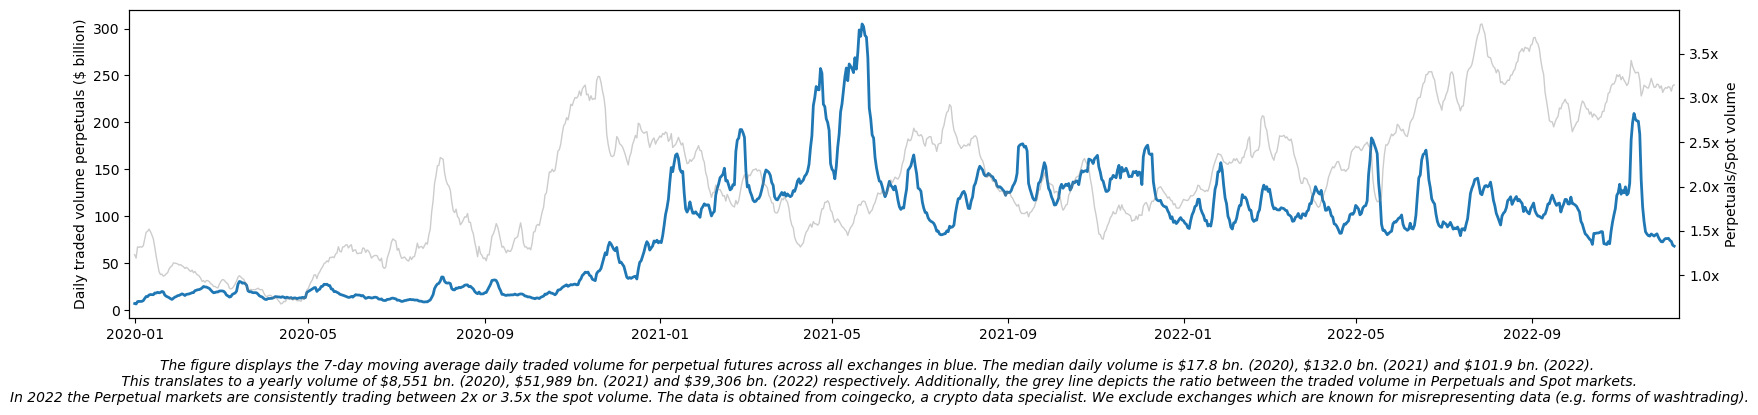

In [154]:


### take a look at the funding rate over time
fig, ax = plt.subplots(figsize =(20,4))

ax.plot(df_chart['date'], (df_chart['sum']/1e3).rolling(7, min_periods=1).mean(), linewidth=2)

secax = ax.twinx()
secax.plot(df_chart['date'], (df_chart['sum']/df_spot['sum']).rolling(7, min_periods=1).mean(), color='grey', linewidth=1, alpha=0.4)

vals = secax.get_yticks()
secax.set_yticklabels(['{:,.1f}'.format(x)+'x' for x in vals])

ax.set_ylabel('Daily traded volume perpetuals ($ billion)')
secax.set_ylabel('Perpetuals/Spot volume')

left, right = plt.xlim()
ax.set_xlim(left+50, right-50)

txt = 'The figure displays the 7-day moving average daily traded volume for perpetual futures across all exchanges in blue. The median daily volume is \$17.8 bn. (2020), \$132.0 bn. (2021) and \$101.9 bn. (2022). \n This translates to a yearly volume of \$8,551 bn. (2020), \$51,989 bn. (2021) and \$39,306 bn. (2022) respectively. Additionally, the grey line depicts the ratio between the traded volume in Perpetuals and Spot markets. \nIn 2022 the Perpetual markets are consistently trading between 2x or 3.5x the spot volume. The data is obtained from coingecko, a crypto data specialist. We exclude exchanges which are known for misrepresenting data (e.g. forms of washtrading).'
fig.text(.5, -.1, txt, ha='center', fontstyle='italic')

plt.savefig(f'figures/exchange_volume.png')

plt.show()



